In [70]:
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

#other
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#!pip install xgboost
#from xgboost.xgbclassifier import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [71]:
#read dataset
preprocessed_df = pd.read_csv('./Data/preprocessed_df.cvs', index_col = 0) 
preprocessed_df.head()

,status_group,amount_tsh,gps_height,longitude,latitude,population,age,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,scheme_name_group_machumba estate pipe line,scheme_name_group_makwale water supplied sche,scheme_name_group_mkongoro one,scheme_name_group_mtwango water supply scheme,scheme_name_group_n,scheme_name_group_ngana water supplied scheme,scheme_name_group_other,scheme_name_group_s,scheme_name_group_uroki-bomang'ombe water sup,scheme_name_group_wanging'ombe water
0,0,6000.0,1390,34.938093,-9.856322,109,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0.0,1399,34.698766,-2.147466,280,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,25.0,686,37.460664,-3.821329,250,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,263,38.486161,-11.155298,58,27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0.0,0,31.130847,-1.825359,150,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
preprocessed_df.shape

(59400, 287)

In [73]:
#define X and y
y = preprocessed_df['status_group']
X = preprocessed_df.drop(['status_group'], axis = 1)

In [74]:
from sklearn.model_selection import train_test_split

#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Deal with Class Imbalance

In [75]:
#previous original class distribution
print('Class Distribution Before:')
print('Train Set')
print(y_train.value_counts())

#fit
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#check class distribution
print('\n')
print('Class Distribution After:')
print('Train Set')
print(pd.Series(y_train).value_counts())

Class Distribution Before:
Train Set
0    25825
1    18210
2     3485
Name: status_group, dtype: int64


Class Distribution After:
Train Set
2    25825
1    25825
0    25825
Name: status_group, dtype: int64


# Data Transformation

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test` of continuous variables.

We want to fit and transform only the training data because in a real-world setting, we only have access to this data. We can then use the same scalar object to transform the test data. 

If we to first transform the data and then split into training and test sets, it will lead to data-leakage. 

In [76]:
from sklearn.preprocessing import MinMaxScaler

#scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

#instantiate
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear', random_state = 21)

#fit
logreg.fit(X_train, y_train)

#predict
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [78]:
#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy is: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy is: {0}'.format(logreg_test_accuracy))

Train accuracy is: 72.32913843175218
Test accuracy is: 71.02693602693603


In [79]:
#train cross validation
logreg_train_cv_score = cross_val_score(logreg, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', logreg_train_cv_score)

#test cross validation
logreg_test_cv_score = cross_val_score(logreg, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', logreg_test_cv_score)

Train cross validation: 0.7077637947725073
Test cross validation: 0.7428451178451179


In [80]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.37432659932659934
Mean Squared Error: 0.5435185185185185
Root Mean Squared Error: 0.7372370843348282


In [81]:
#classification report
logreg_classification_report = classification_report(y_test, y_hat_test)
print('Model: Logistic Regression', '\n', logreg_classification_report)

Model: Logistic Regression 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      6434
           1       0.79      0.65      0.71      4614
           2       0.27      0.44      0.33       832

    accuracy                           0.71     11880
   macro avg       0.60      0.63      0.61     11880
weighted avg       0.74      0.71      0.72     11880



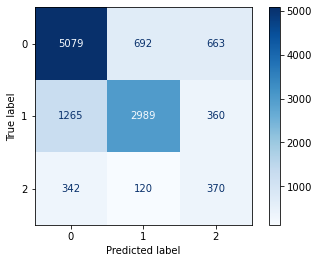

In [82]:
#plot confusion matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap = plt.cm.Blues)

In [83]:
#y_score = logreg.fit(X_train, y_train).decision_function(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_score)

#print('AUC:', auc(fpr, tpr))

In [84]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [], 'CV': [], 
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'MAE': [], 'MSE': [], 'RMSE': [],
                              'AUC': [],
                              })
summary_table.loc[0] = ['Logistic Regression',
                        round(logreg_test_accuracy, 2), round(logreg_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,71.03,0.74,0.63,0.61,0.37,0.54,0.74,-


# K-Nearest Neighbor

In [85]:
#instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

In [86]:
#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy is: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy is: {0}'.format(knn_test_accuracy))

Train accuracy is: 87.46176185866409
Test accuracy is: 75.70707070707071


In [87]:
#train cross validation
knn_train_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', knn_train_cv_score)

#test cross validation
knn_test_cv_score = cross_val_score(knn_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', knn_test_cv_score)

Train cross validation: 0.8030332365279123
Test cross validation: 0.7226430976430975


In [88]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.31102693602693604
Mean Squared Error: 0.44722222222222224
Root Mean Squared Error: 0.6687467549246293


In [89]:
#classification report
knn_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', knn_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      6434
           1       0.80      0.74      0.77      4614
           2       0.35      0.46      0.40       832

    accuracy                           0.76     11880
   macro avg       0.65      0.67      0.66     11880
weighted avg       0.77      0.76      0.76     11880



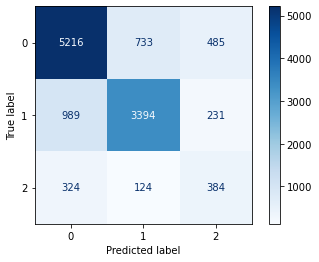

In [90]:
#plot
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [91]:
#summary table
summary_table.loc[1] = ['KNN',
                        round(knn_test_accuracy, 2), round(knn_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,71.03,0.74,0.63,0.61,0.37,0.54,0.74,-
1,KNN,75.71,0.72,0.67,0.66,0.31,0.45,0.67,-


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

#instantiate
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

In [26]:
#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy is: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy is: {0}'.format(decision_tree_test_accuracy))

Train accuracy is: 99.75475959987092
Test accuracy is: 73.38617759817635


In [27]:
#feature importance
decision_tree_clf.feature_importances_

array([1.65470741e-02, 7.24253607e-02, 1.53719032e-01, 1.32550839e-01,
       4.53511313e-02, 4.17049389e-02, 3.21575879e-03, 2.23078252e-03,
       1.40500339e-03, 7.19367839e-04, 1.30340075e-03, 1.57602504e-03,
       1.13946684e-03, 2.10704146e-03, 0.00000000e+00, 4.10467583e-03,
       1.07321862e-02, 3.57403226e-04, 9.34210357e-05, 2.37385199e-04,
       4.39693389e-04, 1.70525439e-04, 2.48622904e-04, 6.22435617e-04,
       5.28236025e-04, 3.19201755e-05, 1.15498699e-04, 4.42938449e-04,
       2.72758432e-04, 2.17142736e-03, 8.45497459e-04, 1.67363852e-04,
       1.25749889e-03, 6.83703407e-05, 1.19998023e-04, 9.10940323e-04,
       1.09530149e-04, 2.52583520e-05, 2.40836286e-04, 3.09708765e-04,
       6.16133309e-04, 1.08901899e-03, 2.01559341e-03, 3.18822344e-03,
       2.76647243e-03, 6.24415516e-04, 1.86156229e-04, 4.35764315e-04,
       1.39740734e-03, 5.15731778e-04, 0.00000000e+00, 9.83926246e-04,
       1.11958366e-04, 9.10406094e-05, 3.37438066e-05, 1.65428432e-04,
      

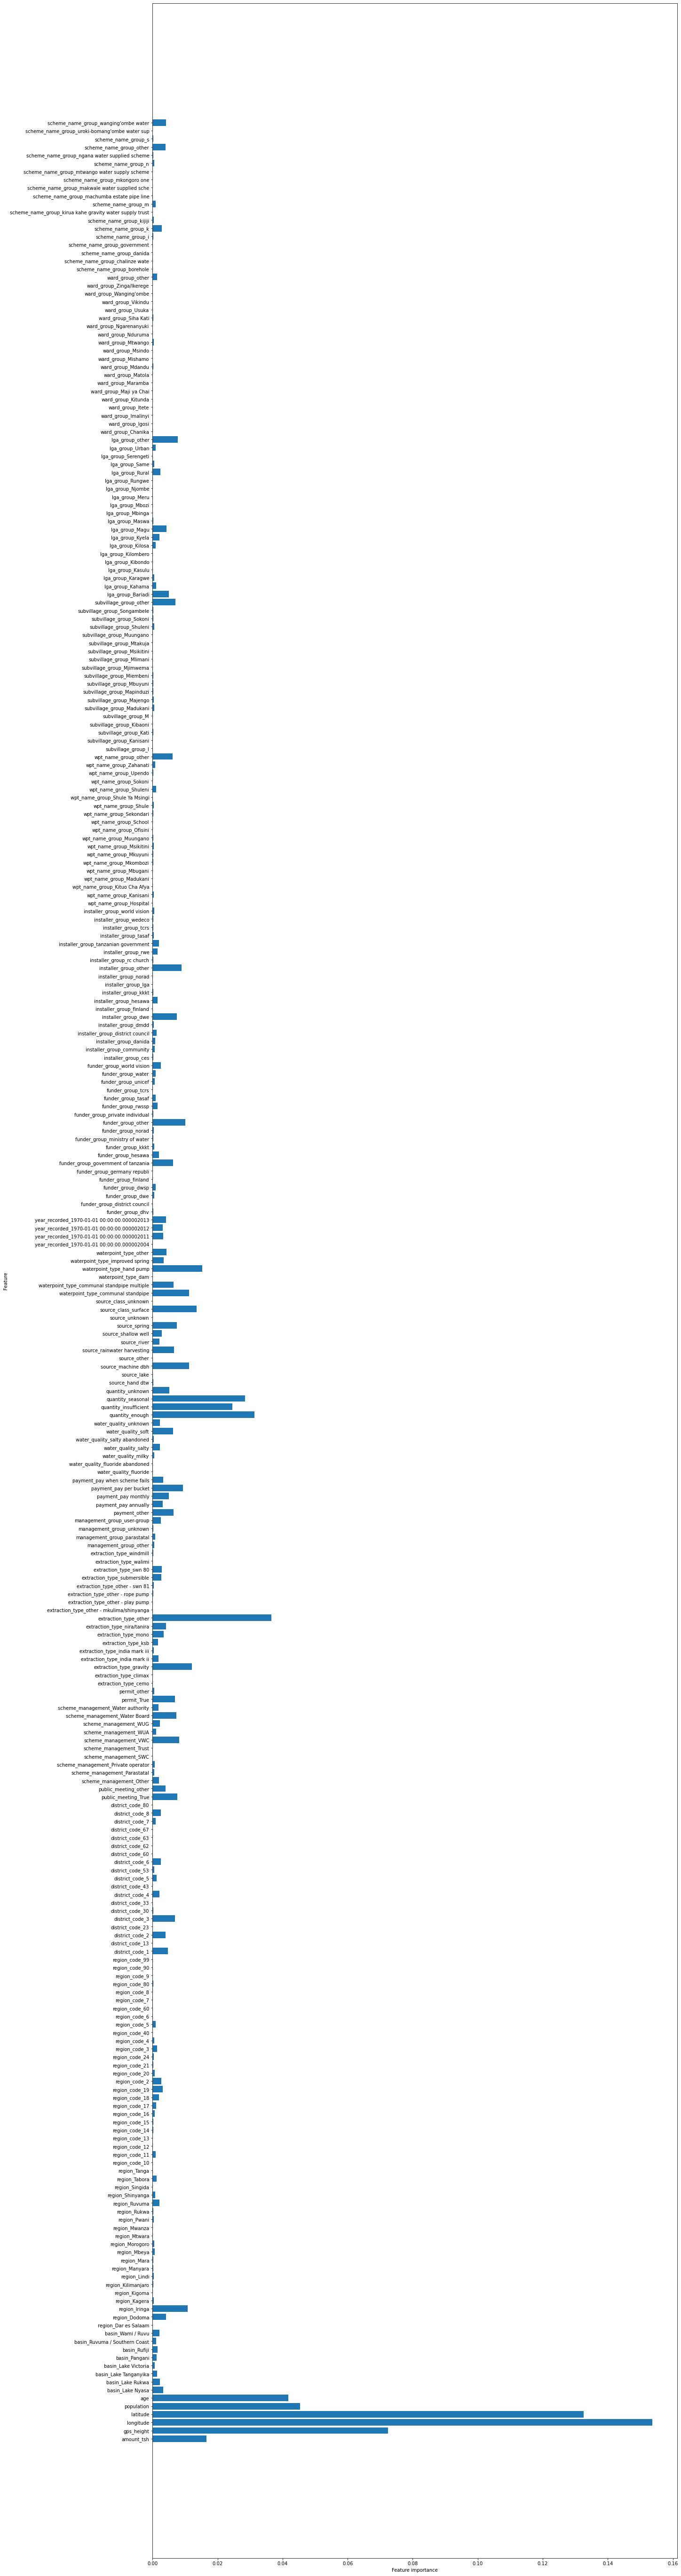

In [28]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (20, 100))
    plt.barh(range(n_features), model.feature_importances_, align = 'center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_tree_clf)

#save
plt.savefig('./Data/decision_tree_clf_feature_importances')

In [29]:
#identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
    decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 21)
    decision_tree_clf.fit(X_train, y_train)
    
    y_hat_train = decision_tree_clf.predict(X_train)
    false_positive_rate, true_positive_rate, threshholds = roc_curve(y_train, y_hat_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #add auc score to previous train results
    train_results.append(roc_auc)
    y_hat_test = decision_tree_clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize = (15, 5))
plt.plot(max_depths, train_results, 'b', label = 'Train AUC')
plt.plot(max_depths, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

ValueError: multiclass format is not supported

In [ ]:
#identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = min_samples_split, random_state = 21)
    decision_tree_clf.fit(X_train, y_train)
    
    y_hat_train = decision_tree_clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_hat_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = decision_tree_clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (15, 5))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [ ]:
#calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = min_samples_leaf, random_state = 21)
    decision_tree_clf.fit(X_train, y_train)
    
    y_hat_train = decision_tree_clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_hat_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_hat_test = decision_tree_clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize = (15, 5))    
plt.plot(min_samples_leafs, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

In [ ]:
#find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state = 21)
    decision_tree_clf.fit(X_train, y_train)
    
    y_hat_train = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_hat_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_hat_test = decision_tree_clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12, 6))
plt.plot(max_features, train_results, 'b', label = 'Train AUC')
plt.plot(max_features, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [ ]:
#train a classifier with optimal values identified above
decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy',
                           max_features = 6,
                           max_depth = 3,
                           min_samples_split = 0.7,
                           min_samples_leaf = 0.25,
                           random_state = 21)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

In [30]:
#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy is: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy is: {0}'.format(decision_tree_test_accuracy))

Train accuracy is: 39.21006776379477
Test accuracy is: 73.38617759817635


In [31]:
#train cross validation
decision_tree_train_cv_score = cross_val_score(decision_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_train_cv_score)

#test cross validation
decision_tree_test_cv_score = cross_val_score(decision_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_test_cv_score)

Train cross validation: 0.39210067763794776
Train cross validation: 0.3971603775230718


In [32]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.3372707491451663
Mean Squared Error: 0.479535799399026
Root Mean Squared Error: 0.6924852340656991


In [33]:
#classification report
decision_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', decision_tree_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      6434
           1       0.69      0.75      0.72      6434
           2       0.79      0.66      0.72      6434

    accuracy                           0.73     19302
   macro avg       0.74      0.73      0.73     19302
weighted avg       0.74      0.73      0.73     19302



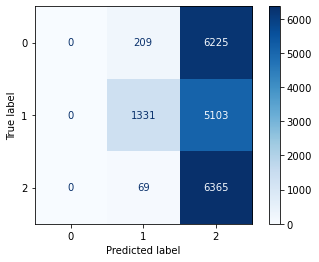

In [34]:
#plot confusion matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [35]:
#check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

In [36]:
#summary table
summary_table.loc[2] = ['Decision Tree',
                        round(decision_tree_test_accuracy, 2), round(decision_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,74.06,0.74,0.74,0.74,0.32,0.45,0.67,-
1,KNN,76.78,0.78,0.77,0.77,0.29,0.40,0.63,-
2,Decision Tree,73.39,0.40,0.73,0.73,0.34,0.48,0.69,-


# CART Regressor

In [ ]:
#instantiate 
dt_regressor_clf = DecisionTreeRegressor(random_state = 21)

#fit
dt_regressor_clf.fit(X_train, y_train)

#predict
y_hat_train = dt_regressor_clf.predict(X_train)
y_hat_test = dt_regressor_clf.predict(X_test)

In [ ]:
#train accuracy
dt_regressor_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Test accuracy: {0}'.format(dt_regressor_train_accuracy))

#test accuracy
dt_regressor_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(dt_regressor_test_accuracy))

In [ ]:
#train cross validation
dt_regressor_train_cv_score = cross_val_score(dt_regressor_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', dt_regressor_train_cv_score)

#test cross validation
dt_regressor_test_cv_score = cross_val_score(dt_regressor_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', dt_regressor_test_cv_score)

In [ ]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

In [ ]:
#classification report
dt_regressor_classification_report = classification_report(y_test, y_hat_test)
print('Model: Decision Tree Regressor', '\n', dt_regressor_classification_report)

In [ ]:
#plot confusion matrix
plot_confusion_matrix(dt_regressor_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [ ]:
#summary table
summary_table.loc[2] = ['CART Tree',
                        round(dt_regressor_test_accuracy, 2), round(dt_regressor_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

# Bagged Tree

In [41]:
#instantiate
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = 5), n_estimators = 20, random_state = 21)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

In [42]:
#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

Train accuracy: 58.58018715714747
Test accuracy: 57.854108382551026


In [43]:
#train cross validation
bagged_tree_train_cv_score = cross_val_score(bagged_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', bagged_tree_train_cv_score)

#test cross validation
bagged_tree_test_cv_score = cross_val_score(bagged_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', bagged_tree_test_cv_score)

Test cross validation: 0.5813359148112294
Train cross validation: 0.5857437534639607


In [44]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.5822194591234069
Mean Squared Error: 0.9037405450212413
Root Mean Squared Error: 0.9506526942165795


In [45]:
#classification report
bagged_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: Bagged Tree', '\n', bagged_tree_classification_report)

Model: Bagged Tree 
               precision    recall  f1-score   support

           0       0.53      0.77      0.63      6434
           1       0.64      0.50      0.56      6434
           2       0.60      0.47      0.53      6434

    accuracy                           0.58     19302
   macro avg       0.59      0.58      0.57     19302
weighted avg       0.59      0.58      0.57     19302



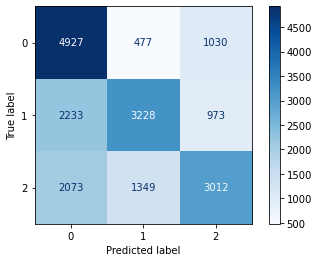

In [46]:
#plot confusion matrix
plot_confusion_matrix(bagged_tree_clf, X_test, y_test, cmap = plt.cm.Blues)

In [47]:
#summary table
summary_table.loc[3] = ['Bagged Tree',
                        round(bagged_tree_test_accuracy, 2), round(bagged_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,74.06,0.74,0.74,0.74,0.32,0.45,0.67,-
1,KNN,76.78,0.78,0.77,0.77,0.29,0.40,0.63,-
2,Decision Tree,73.39,0.40,0.73,0.73,0.34,0.48,0.69,-
3,Bagged Tree,57.85,0.59,0.58,0.57,0.58,0.90,0.95,-


# Random Forest

In [48]:
#instantiate
random_forest_clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 21)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

In [49]:
#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

Train accuracy: 64.84027105517909
Test accuracy: 66.3713604807792


In [50]:
#train cross validation
random_forest_train_cv_score = cross_val_score(random_forest_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', random_forest_train_cv_score)

#test cross validation
random_forest_test_cv_score = cross_val_score(random_forest_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', random_forest_test_cv_score)

Train cross validation: 0.6335592126492416
Test cross validation: 0.6545441796737135


In [51]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4336856284322868
Mean Squared Error: 0.6284840949124443
Root Mean Squared Error: 0.7927698877432494


In [52]:
#classification report
random_forest_classification_report = classification_report(y_test, y_hat_test)
print('Model: Random Forest', '\n', random_forest_classification_report)

Model: Random Forest 
               precision    recall  f1-score   support

           0       0.65      0.70      0.68      6434
           1       0.67      0.56      0.61      6434
           2       0.67      0.73      0.70      6434

    accuracy                           0.66     19302
   macro avg       0.66      0.66      0.66     19302
weighted avg       0.66      0.66      0.66     19302



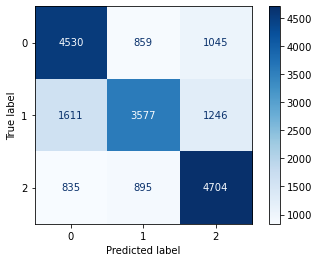

In [53]:
#plot confusion matrix
plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap = plt.cm.Blues)

In [54]:
#summary table
summary_table.loc[4] = ['Random Forest',
                        round(random_forest_test_accuracy, 2), round(random_forest_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,74.06,0.74,0.74,0.74,0.32,0.45,0.67,-
1,KNN,76.78,0.78,0.77,0.77,0.29,0.40,0.63,-
2,Decision Tree,73.39,0.40,0.73,0.73,0.34,0.48,0.69,-
3,Bagged Tree,57.85,0.59,0.58,0.57,0.58,0.90,0.95,-
4,Random Forest,66.37,0.65,0.66,0.66,0.43,0.63,0.79,-


# Gradient Boosting

In [56]:
#instantiate
gradient_boost_clf = GradientBoostingClassifier(random_state = 21)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

In [57]:
#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 73.25847047434657
Test accuracy: 74.15811832970677


In [58]:
#train cross validation
gradient_boost_train_cv_score = cross_val_score(gradient_boost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_train_cv_score)

#test cross validation
gradient_boost_test_cv_score = cross_val_score(gradient_boost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_test_cv_score)

Train cross validation: 0.7164375605033882
Train cross validation: 0.7406500369712805


In [59]:
#evaluate
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.3269091285877111
Mean Squared Error: 0.4638897523572687
Root Mean Squared Error: 0.681094525273305


In [60]:
#classification report
gradient_boost_classification_report = classification_report(y_test, y_hat_test)
print('Model: Gradient Boosting', '\n', gradient_boost_classification_report)

Model: Gradient Boosting 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6434
           1       0.77      0.61      0.68      6434
           2       0.74      0.84      0.78      6434

    accuracy                           0.74     19302
   macro avg       0.74      0.74      0.74     19302
weighted avg       0.74      0.74      0.74     19302



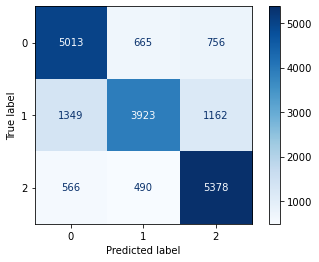

In [61]:
#plot confusion matrix
plot_confusion_matrix(gradient_boost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [62]:
#summary table
summary_table.loc[5] = ['Gradient Boost',
                        round(gradient_boost_test_accuracy, 2), round(gradient_boost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,74.06,0.74,0.74,0.74,0.32,0.45,0.67,-
1,KNN,76.78,0.78,0.77,0.77,0.29,0.40,0.63,-
2,Decision Tree,73.39,0.40,0.73,0.73,0.34,0.48,0.69,-
3,Bagged Tree,57.85,0.59,0.58,0.57,0.58,0.90,0.95,-
4,Random Forest,66.37,0.65,0.66,0.66,0.43,0.63,0.79,-


# AdaBoost

In [63]:
#instantiate
adaboost_clf = AdaBoostClassifier(random_state = 21)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

In [64]:
#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0} '.format(adaboost_train_accuracy))

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0} '.format(adaboost_test_accuracy))

Train accuracy: 65.71668280090351 
Test accuracy: 67.04486581701377 


In [65]:
#train cross validation
adaboost_train_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', adaboost_train_cv_score)

#test cross validation
adaboost_test_cv_score = cross_val_score(adaboost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', adaboost_test_cv_score)

Train cross validation: 0.6424394966118102
Test cross validation: 0.6719524325223807


In [66]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4224950782302352
Mean Squared Error: 0.6083825510309813
Root Mean Squared Error: 0.77998881468325


In [67]:
#classification report
adaboost_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', adaboost_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      6434
           1       0.68      0.54      0.61      6434
           2       0.65      0.76      0.70      6434

    accuracy                           0.67     19302
   macro avg       0.67      0.67      0.67     19302
weighted avg       0.67      0.67      0.67     19302



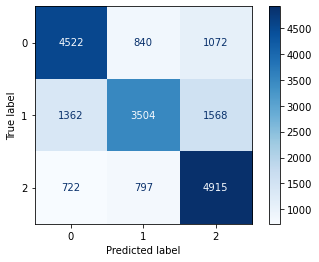

In [68]:
#plot confusion matrix
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [69]:
#summary table
summary_table.loc[6] = ['ADABoost',
                        round(adaboost_test_accuracy, 2), round(adaboost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-']
summary_table.head()

,Model,Accuracy,CV,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,74.06,0.74,0.74,0.74,0.32,0.45,0.67,-
1,KNN,76.78,0.78,0.77,0.77,0.29,0.40,0.63,-
2,Decision Tree,73.39,0.40,0.73,0.73,0.34,0.48,0.69,-
3,Bagged Tree,57.85,0.59,0.58,0.57,0.58,0.90,0.95,-
4,Random Forest,66.37,0.65,0.66,0.66,0.43,0.63,0.79,-


# XGBoost

In [ ]:
!pip install xgboost

#instantiate
xgb_clf = xgboost.XGBClassifier()

#fit
xgb_clf.fit(X_train, y_train)

# Support Vector Machine

In [ ]:
#instantiate
svm_clf = SVC(C = 5000000, random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

In [ ]:
#get coefficients
svm_clf.coef_

# Models Comparison

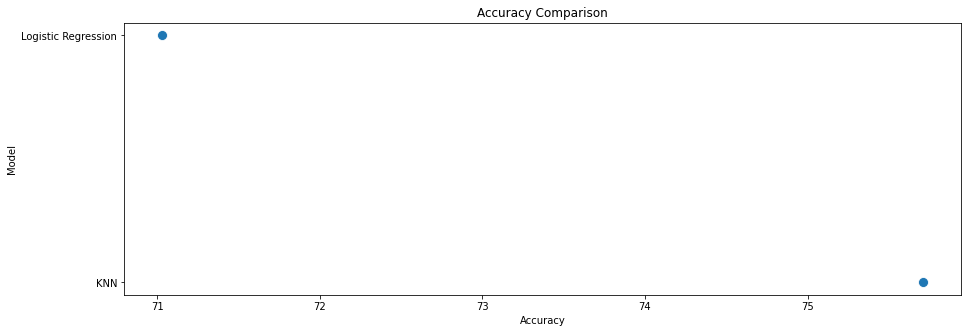

In [107]:
#plot accuracy
plt.figure(figsize = (15, 5))
sns.scatterplot(x = summary_table['Accuracy'], y = summary_table['Model'], s = 100, marker = 'o')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title("Accuracy Comparison")

plt.savefig('./Data/models_comparison')

# Submission Dataframe

In [ ]:
prediction = clf.predict(test_values[features])
prediction_df = pd.DataFrame(prediction, columns=["status_group"])
submission = pd.merge(test_values.id.reset_index()["id"].to_frame(), prediction_df, right_index = True, left_index = True)
submission.head()
submission.to_csv("sub.csv", index = False)